In [1]:
# libraryTest.py
# Check the versions of libraries


# Python version

import sys

print('Python: {}'.format(sys.version))

# scipy

import scipy

print('scipy: {}'.format(scipy.__version__))

# numpy

import numpy

print('numpy: {}'.format(numpy.__version__))

# matplotlib

import matplotlib

print('matplotlib: {}'.format(matplotlib.__version__))

# pandas

import pandas

print('pandas: {}'.format(pandas.__version__))

# scikit-learn

import sklearn

print('sklearn: {}'.format(sklearn.__version__))

Python: 3.13.3 (v3.13.3:6280bb54784, Apr  8 2025, 10:47:54) [Clang 15.0.0 (clang-1500.3.9.4)]
scipy: 1.16.1
numpy: 2.3.2
matplotlib: 3.10.5
pandas: 2.3.1
sklearn: 1.7.1


In [2]:
# section3.py
# Load libraries


import math

from pandas import read_csv

from pandas.plotting import scatter_matrix

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

print("hello world")


# Load dataset

url = "~/Documents/Programming/AIPlayground/MedicalML/DWBCD/breast+cancer+wisconsin+diagnostic/wdbc.data"

# WBC data set has 32 columns, 569 rows
names = ['ID','Diagnosis','radius1','texture1','perimeter1','area1',
         'smoothness1','compactness1','concavity1','concave_points1',
         'symmetry1','fractal_dimension1','radius2','texture2','perimeter2',
         'area2','smoothness2','compactness2','concavity2','concave_points2',
         'symmetry2','fractal_dimension2','radius3','texture3','perimeter3',
         'area3','smoothness3','compactness3','concavity3','concave_points3',
         'symmetry3','fractal_dimension3']

dataset = read_csv(url, names=names)

dataset_chunks = []

chunk_width = 8
num_chunks = math.ceil(len(names)/chunk_width)
for i in range (0,num_chunks):
    print(names[i*chunk_width:(i+1)*chunk_width])
    dataset_chunks.append(dataset[names[i*chunk_width:(i+1)*chunk_width]])
    

# print(dataset)


# shape
print("***** Shape:")
for d in dataset_chunks:
    print(d.shape)

# head
print("***** Head:")
for d in dataset_chunks:
    print(d.head(20))

# descriptions
print("***** Descriptions:")
for d in dataset_chunks:
    print(d.describe())

# class distribution
print("***** Class Distribution:")
print(dataset.groupby('Diagnosis').size())
print("best guess is the dtype: int64 means the size values (i.e. the number 357) are of type int64")

# playing with what is the type output after it
print(dataset.groupby('Diagnosis'))
print(dataset.groupby('Diagnosis').mean())
print(dataset.groupby('Diagnosis')["radius1"].mean())

hello world
['ID', 'Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1']
['concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2']
['smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3']
['perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']
***** Shape:
(569, 8)
(569, 8)
(569, 8)
(569, 8)
***** Head:
          ID Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
0     842302         M    17.99     10.38      122.80  1001.0      0.11840   
1     842517         M    20.57     17.77      132.90  1326.0      0.08474   
2   84300903         M    19.69     21.25      130.00  1203.0      0.10960   
3   84348301         M    11.42     20.38       77.58   386.1      0.14250   
4   84358402         M    20.29     14.34      135.10  1297.0      0.10030   
5

['ID', 'Diagnosis', 'radius1', 'texture1']
['perimeter1', 'area1', 'smoothness1', 'compactness1']
['concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1']
['radius2', 'texture2', 'perimeter2', 'area2']
['smoothness2', 'compactness2', 'concavity2', 'concave_points2']
['symmetry2', 'fractal_dimension2', 'radius3', 'texture3']
['perimeter3', 'area3', 'smoothness3', 'compactness3']
['concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']


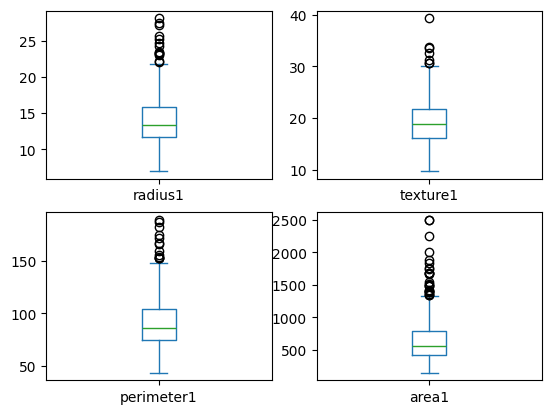

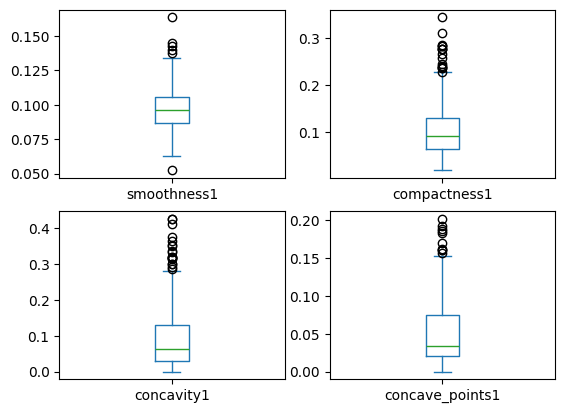

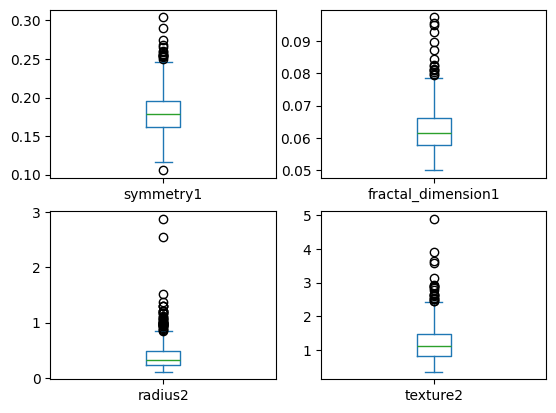

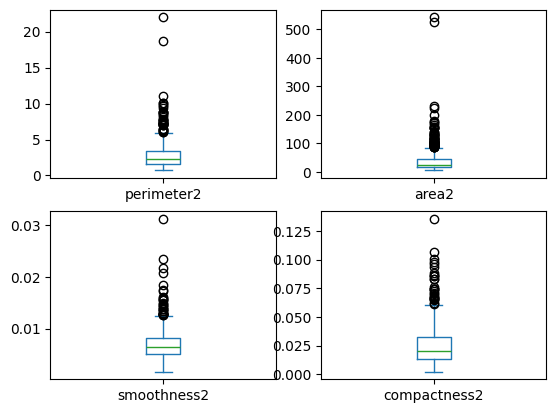

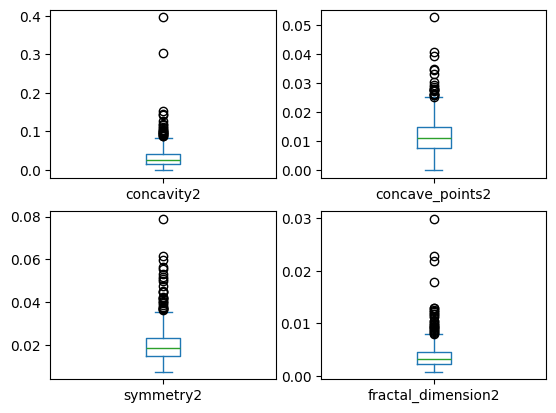

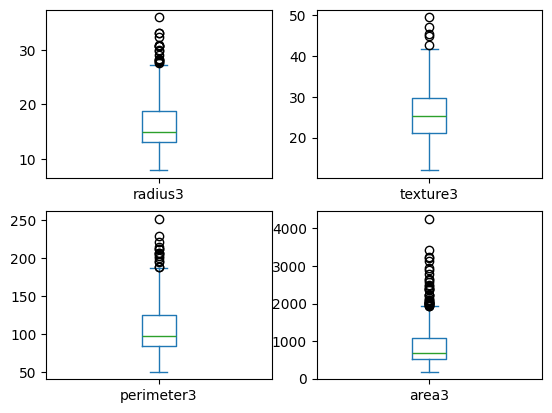

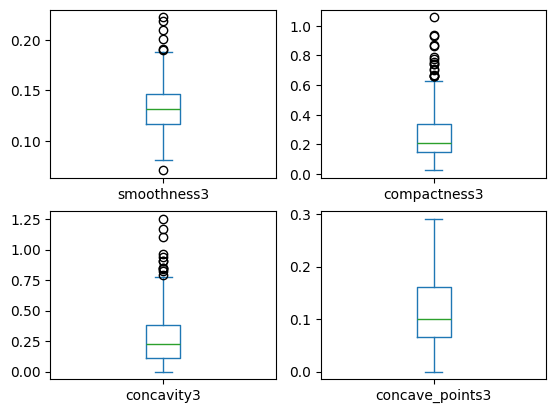

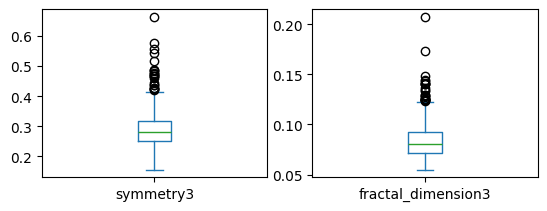

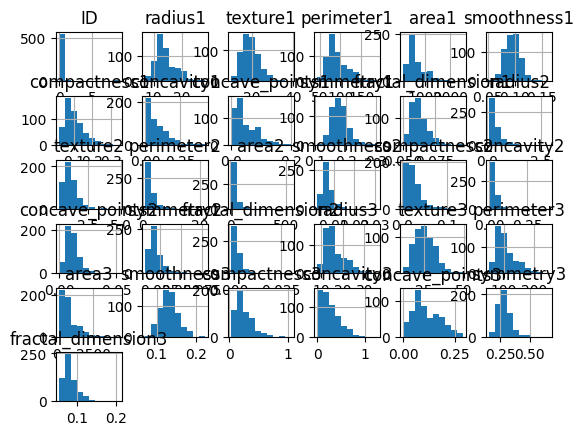

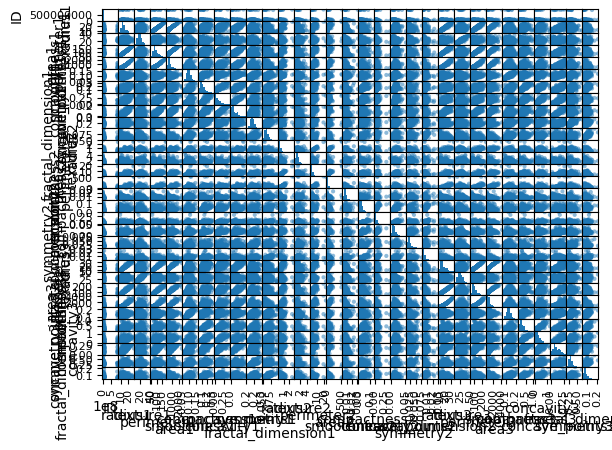

In [3]:
# section4.py
# visualize the data


import math

from pandas import read_csv

from pandas.plotting import scatter_matrix

from matplotlib import pyplot as plt

# Load dataset

def load_dataset():
    url = "~/Documents/Programming/AIPlayground/MedicalML/DWBCD/breast+cancer+wisconsin+diagnostic/wdbc.data"

    # WBC data set has 32 columns, 569 rows
    names = ['ID','Diagnosis','radius1','texture1','perimeter1','area1',
            'smoothness1','compactness1','concavity1','concave_points1',
            'symmetry1','fractal_dimension1','radius2','texture2','perimeter2',
            'area2','smoothness2','compactness2','concavity2','concave_points2',
            'symmetry2','fractal_dimension2','radius3','texture3','perimeter3',
            'area3','smoothness3','compactness3','concavity3','concave_points3',
            'symmetry3','fractal_dimension3']
    feature_names = [n for n in names if n not in ['ID','Diagnosis']]
    dataset = read_csv(url, names=names)

    dataset_features_only = dataset.drop(columns=['ID','Diagnosis'])

    dataset_chunks = []
    dataset_chunks_features_only = []

    chunk_width = 4
    num_chunks = math.ceil(len(names)/chunk_width)
    for i in range (0,num_chunks):
        print(names[i*chunk_width:(i+1)*chunk_width])
        dataset_chunks.append(dataset[names[i*chunk_width:(i+1)*chunk_width]])
        dataset_chunks_features_only.append(dataset_features_only[feature_names[i*chunk_width:(i+1)*chunk_width]])
        
    
    return (dataset, dataset_features_only, dataset_chunks, dataset_chunks_features_only)


(dataset, dataset_features_only, dataset_chunks, dataset_chunks_features_only) = load_dataset()


# box and whisker plots

# I have 30 features, layout=(rows,columns)

showBoxAndWhisker = True
if showBoxAndWhisker:
    first_iter = True
    for chunk in dataset_chunks_features_only:
        if first_iter:
            first_iter = False
        else:
            # plt.figure()
            pass
        chunk.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
        

    plt.show()

# histograms
showHistogram = True
if showHistogram:
    dataset.hist()

    plt.show()



# scatter plot matrix

scatter_matrix(dataset)

plt.show()

['ID', 'Diagnosis', 'radius1', 'texture1']
['perimeter1', 'area1', 'smoothness1', 'compactness1']
['concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1']
['radius2', 'texture2', 'perimeter2', 'area2']
['smoothness2', 'compactness2', 'concavity2', 'concave_points2']
['symmetry2', 'fractal_dimension2', 'radius3', 'texture3']
['perimeter3', 'area3', 'smoothness3', 'compactness3']
['concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']
LR: 0.945121 (0.031251)
LDA: 0.947343 (0.036698)
KNN: 0.916570 (0.041193)
CART: 0.938502 (0.023541)
NB: 0.936377 (0.042049)


/Users/pneri/.virtualenvs/WBCVenv3_13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/pneri/.virtualenvs/WBCVenv3_13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/pneri/.virtualenvs/WBCVenv3_13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/pneri/.virtualenvs/WBCVenv3_13

SVM: 0.626329 (0.004106)


/var/folders/d9/q6jd06412l711r_hs7mz660h0000gn/T/ipykernel_81887/3913655186.py:139: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=names)


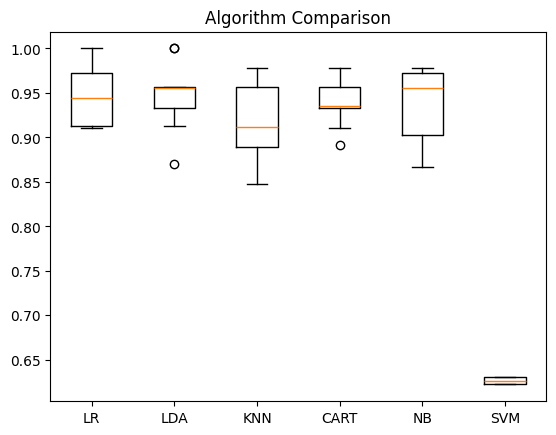

In [4]:
# section5.py
# train models


import math

from pandas import read_csv

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

DEBUG = False

# Load dataset

def load_dataset():
    url = "~/Documents/Programming/AIPlayground/MedicalML/DWBCD/breast+cancer+wisconsin+diagnostic/wdbc.data"

    # WBC data set has 32 columns, 569 rows
    names = ['ID','Diagnosis','radius1','texture1','perimeter1','area1',
            'smoothness1','compactness1','concavity1','concave_points1',
            'symmetry1','fractal_dimension1','radius2','texture2','perimeter2',
            'area2','smoothness2','compactness2','concavity2','concave_points2',
            'symmetry2','fractal_dimension2','radius3','texture3','perimeter3',
            'area3','smoothness3','compactness3','concavity3','concave_points3',
            'symmetry3','fractal_dimension3']
    feature_names = [n for n in names if n not in ['ID','Diagnosis']]
    dataset = read_csv(url, names=names)

    dataset_features_only = dataset.drop(columns=['ID','Diagnosis'])

    dataset_chunks = []
    dataset_chunks_features_only = []

    chunk_width = 4
    num_chunks = math.ceil(len(names)/chunk_width)
    for i in range (0,num_chunks):
        print(names[i*chunk_width:(i+1)*chunk_width])
        dataset_chunks.append(dataset[names[i*chunk_width:(i+1)*chunk_width]])
        dataset_chunks_features_only.append(dataset_features_only[feature_names[i*chunk_width:(i+1)*chunk_width]])
        
    
    return (dataset, dataset_features_only, dataset_chunks, dataset_chunks_features_only)


(dataset, dataset_features_only, dataset_chunks, dataset_chunks_features_only) = load_dataset()



# Split-out validation dataset

if DEBUG:
    print(dataset)

array = dataset.values

if DEBUG:
    print(array) # correct

X = array[:,2:32] # X is columns 3 to 32

if DEBUG:
    print(X) # correct

y = array[:,1] # y is 2nd column, index 1

if DEBUG:
    print(y) # correct

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

if DEBUG:
    print(X_train) 
    print(Y_train) # first 3 train examples correspond between X and Y
    print(X_validation)
    print(Y_validation) # first 3 validation examples correspond between X and Y
    print(len(X),len(X_train),len(Y_train),len(X_validation),len(Y_validation)) # lengths are 20% and 80% as they should be


#issue 5.3 section:

# Spot Check Algorithms

models = []

models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))

models.append(('LDA', LinearDiscriminantAnalysis()))

models.append(('KNN', KNeighborsClassifier()))

models.append(('CART', DecisionTreeClassifier()))

models.append(('NB', GaussianNB()))

models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn

results = []

names = []

for name, model in models:

    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')

    results.append(cv_results)

    names.append(name)

    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    # test: everything but CART does the same when I run it twice


# issue 5.4

# Compare Algorithms

plt.boxplot(results, labels=names)

plt.title('Algorithm Comparison')

plt.show()

In [5]:
# section6.py
# make predictions


import math

from pandas import read_csv

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


#from section 5

DEBUG = False

# Load dataset

def load_dataset():
    url = "~/Documents/Programming/AIPlayground/MedicalML/DWBCD/breast+cancer+wisconsin+diagnostic/wdbc.data"

    # WBC data set has 32 columns, 569 rows
    names = ['ID','Diagnosis','radius1','texture1','perimeter1','area1',
            'smoothness1','compactness1','concavity1','concave_points1',
            'symmetry1','fractal_dimension1','radius2','texture2','perimeter2',
            'area2','smoothness2','compactness2','concavity2','concave_points2',
            'symmetry2','fractal_dimension2','radius3','texture3','perimeter3',
            'area3','smoothness3','compactness3','concavity3','concave_points3',
            'symmetry3','fractal_dimension3']
    feature_names = [n for n in names if n not in ['ID','Diagnosis']]
    dataset = read_csv(url, names=names)

    dataset_features_only = dataset.drop(columns=['ID','Diagnosis'])

    dataset_chunks = []
    dataset_chunks_features_only = []

    chunk_width = 4
    num_chunks = math.ceil(len(names)/chunk_width)
    for i in range (0,num_chunks):
        print(names[i*chunk_width:(i+1)*chunk_width])
        dataset_chunks.append(dataset[names[i*chunk_width:(i+1)*chunk_width]])
        dataset_chunks_features_only.append(dataset_features_only[feature_names[i*chunk_width:(i+1)*chunk_width]])
        
    
    return (dataset, dataset_features_only, dataset_chunks, dataset_chunks_features_only)


(dataset, dataset_features_only, dataset_chunks, dataset_chunks_features_only) = load_dataset()



# Split-out validation dataset

if DEBUG:
    print(dataset)

array = dataset.values

if DEBUG:
    print(array) # correct

X = array[:,2:32] # X is columns 3 to 32

if DEBUG:
    print(X) # correct

y = array[:,1] # y is 2nd column, index 1

if DEBUG:
    print(y) # correct

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

if DEBUG:
    print(X_train) 
    print(Y_train) # first 3 train examples correspond between X and Y
    print(X_validation)
    print(Y_validation) # first 3 validation examples correspond between X and Y
    print(len(X),len(X_train),len(Y_train),len(X_validation),len(Y_validation)) # lengths are 20% and 80% as they should be


# section 6.1

# Make predictions on validation dataset

model = LinearDiscriminantAnalysis()

model.fit(X_train, Y_train)

predictions = model.predict(X_validation)

print(X_validation)
print(predictions) # seems correctish now that I am using the correct data (mix of M and B). On first 3 examples, they were all correctly classified

# issue 6.2

# Evaluate predictions

print(accuracy_score(Y_validation, predictions))

print(confusion_matrix(Y_validation, predictions))

print(classification_report(Y_validation, predictions))

['ID', 'Diagnosis', 'radius1', 'texture1']
['perimeter1', 'area1', 'smoothness1', 'compactness1']
['concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1']
['radius2', 'texture2', 'perimeter2', 'area2']
['smoothness2', 'compactness2', 'concavity2', 'concave_points2']
['symmetry2', 'fractal_dimension2', 'radius3', 'texture3']
['perimeter3', 'area3', 'smoothness3', 'compactness3']
['concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']
[[14.69 13.98 98.22 ... 0.1108 0.2827 0.09208]
 [13.17 18.66 85.98 ... 0.2088 0.39 0.1179]
 [12.95 16.02 83.14 ... 0.1056 0.338 0.09584]
 ...
 [9.029 17.33 58.79 ... 0.175 0.4228 0.1175]
 [14.53 19.34 94.25 ... 0.09594 0.2471 0.07463]
 [13.78 15.79 88.37 ... 0.03312 0.1859 0.0681]]
['B' 'M' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B'

In [6]:
# section7-2.py
# z-score normalization


import math

from pandas import read_csv

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

DEBUG = False

# Load dataset

def load_dataset():
    url = "~/Documents/Programming/AIPlayground/MedicalML/DWBCD/breast+cancer+wisconsin+diagnostic/wdbc.data"

    # WBC data set has 32 columns, 569 rows
    names = ['ID','Diagnosis','radius1','texture1','perimeter1','area1',
            'smoothness1','compactness1','concavity1','concave_points1',
            'symmetry1','fractal_dimension1','radius2','texture2','perimeter2',
            'area2','smoothness2','compactness2','concavity2','concave_points2',
            'symmetry2','fractal_dimension2','radius3','texture3','perimeter3',
            'area3','smoothness3','compactness3','concavity3','concave_points3',
            'symmetry3','fractal_dimension3']
    feature_names = [n for n in names if n not in ['ID','Diagnosis']]
    dataset = read_csv(url, names=names)

    dataset_features_only = dataset.drop(columns=['ID','Diagnosis'])

    dataset_chunks = []
    dataset_chunks_features_only = []

    chunk_width = 4
    num_chunks = math.ceil(len(names)/chunk_width)
    for i in range (0,num_chunks):
        print(names[i*chunk_width:(i+1)*chunk_width])
        dataset_chunks.append(dataset[names[i*chunk_width:(i+1)*chunk_width]])
        dataset_chunks_features_only.append(dataset_features_only[feature_names[i*chunk_width:(i+1)*chunk_width]])
        
    
    return (dataset, dataset_features_only, dataset_chunks, dataset_chunks_features_only)


(dataset, dataset_features_only, dataset_chunks, dataset_chunks_features_only) = load_dataset()

# issue 7.2.2 normalization:
dataset_scaled = dataset.copy() 
  
# apply normalization techniques 
for column in dataset_scaled.columns: 
    try:
        dataset_scaled[column] = (dataset_scaled[column] -
                           dataset_scaled[column].mean()) / dataset_scaled[column].std()
    except Exception as e:
        print("EXCEPTION:")
        print(e)
        print("END OF EXCEPTION")
        # don't scale if there is an exception, as happens with Diagnosis column
  
# view normalized data to check if works, when doing Z score normalization, all seem to max out in 100-200 range, better than some being in 1000's and some being in 0.01's   
# dataset_scaled.hist()

# Split-out validation dataset

if DEBUG:
    print(dataset_scaled)

array = dataset_scaled.values

if DEBUG:
    print(array) # correct

X = array[:,2:32] # X is columns 3 to 32

if DEBUG:
    print(X) # correct

y = array[:,1] # y is 2nd column, index 1

if DEBUG:
    print(y) # correct

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

if DEBUG:
    print(X_train) 
    print(Y_train) # first 3 train examples correspond between X and Y
    print(X_validation)
    print(Y_validation) # first 3 validation examples correspond between X and Y
    print(len(X),len(X_train),len(Y_train),len(X_validation),len(Y_validation)) # lengths are 20% and 80% as they should be


#issue 5.3 section:

# Spot Check Algorithms

models = []

models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))

models.append(('LDA', LinearDiscriminantAnalysis()))

models.append(('KNN', KNeighborsClassifier()))

models.append(('CART', DecisionTreeClassifier()))

models.append(('NB', GaussianNB()))

models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn

results = []

names = []

for name, model in models:

    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')

    results.append(cv_results)

    names.append(name)

    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    # test: everything but CART does the same when I run it twice


# issue 5.4

# Compare Algorithms

SHOW7_5_2_1 = False
if SHOW7_5_2_1:
    plt.boxplot(results, labels=names)

    plt.title('Algorithm Comparison')

    plt.show()



# section 7.2.5.2.1 (6b.1)

# Make predictions on validation dataset

model = LogisticRegression(solver='liblinear', multi_class='ovr')

model.fit(X_train, Y_train)

predictions = model.predict(X_validation)

print(X_validation)
print(predictions) # seems correctish now that I am using the correct data (mix of M and B). On first 3 examples, they were all correctly classified

# issue 7.2.5.2.2 (6b.2)

# Evaluate predictions

print(accuracy_score(Y_validation, predictions))

print(confusion_matrix(Y_validation, predictions))

print(classification_report(Y_validation, predictions))

['ID', 'Diagnosis', 'radius1', 'texture1']
['perimeter1', 'area1', 'smoothness1', 'compactness1']
['concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1']
['radius2', 'texture2', 'perimeter2', 'area2']
['smoothness2', 'compactness2', 'concavity2', 'concave_points2']
['symmetry2', 'fractal_dimension2', 'radius3', 'texture3']
['perimeter3', 'area3', 'smoothness3', 'compactness3']
['concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']
EXCEPTION:
Could not convert string 'MMMMMMMMMMMMMMMMMMMBBBMMMMMMMMMMMMMMMBMMMMMMMMBMBBBBBMMBMMBBBBMBMMBBBBMBMMBMBMMBBBMMBMMMBBBMBBMMBBBMMBBBBMBBMBBBBBBBBMMMBMMBBBMMBMBMMBMMBBMBBMBBBBMBBBBBBBBBMBBBBMMBMBBMMBBMMBBBBMBBMMMBMBMBBBMBBMMBMMMMBMMMBMBMBBMBMMMMBBMMBBBMBBBBBMMBBMBBMMBMBBBBMBBBBBMBMMMMMMMMMMMMMMBBBBBBMBMBBMBBMBMMBBBBBBBBBBBBBMBBMBMBBBBBBBBBBBBBBMBBBMBMBBBBMMMBBBBMBMBMBBBMBBBBBBBMMMBBBBBBBBBBBMMBMMMBMMBBBBBMBBBBBMBBBMBBMMBBBBBBMBBBBBBBMBBBBBMBBMBBBBBBBBBBBBMBMMBMBBBBBMBBMBMBBMBMBBBBBBBBMMBBBBBBMBBBBBBBBBBMBBBBBBBMBMBBMBBBBBMMB

/Users/pneri/.virtualenvs/WBCVenv3_13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/pneri/.virtualenvs/WBCVenv3_13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/pneri/.virtualenvs/WBCVenv3_13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/pneri/.virtualenvs/WBCVenv3_13

In [ ]:
# section 8
# pytorch neural network
# import torch
# from torch import nn
# from WBCWithPytorchNN import NeuralNetwork

# device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
# print(f"Using {device} device")

# input_size = len(X_train[0])
# print(f"input_size: {input_size}")
# model = NeuralNetwork(input_size).to(device)
# print(model)
# print(X_train)
# logits = model(X_train)
# pred_probab = nn.Softmax(dim=1)(logits)
# y_pred = pred_probab.argmax(1)
# print(f"Predicted class: {y_pred}")


# tensorflow neural network

#WARNING: I re-used test data after looking at the results above. If this were a real world problem, this over-use of the test data would make the algorithms used less likely to reflect real world data. However, the code below (and this whole file) is for the purpose of me learning how to write the algorithms so in this case there are no real-world consequences, just don't model any real-world scripts off my re-use of the test data

from WBCWithPytorchNN3 import TFNeuralNetwork

X_train_for_tf, X_validation_for_tf, Y_train_for_tf, Y_validation_for_tf = train_test_split(X_train, Y_train, test_size=0.20, random_state=1)

Y_train_for_tf_int = (Y_train_for_tf == "M").astype(int)
Y_validation_for_tf_int = (Y_validation_for_tf == "M").astype(int)

print(X_train_for_tf)
X_train_for_tf = numpy.float64(X_train_for_tf)
X_validation_for_tf = numpy.float64(X_validation_for_tf)

print(X_train_for_tf)
print(Y_train_for_tf)
print(Y_train_for_tf_int)


print(X_train_for_tf.shape)
print("xtrain type",type(X_train_for_tf), type(X_train_for_tf[0]), type(X_train_for_tf[0][0]))
print("ytrain type", type(Y_train_for_tf_int), type(Y_train_for_tf_int[0]))


wbc_tfnn = TFNeuralNetwork(input_shape=X_train_for_tf.shape[1:2], output_length=2)
wbc_tfnn.train(X_train_for_tf, Y_train_for_tf_int)
wbc_tfnn.predict(X_validation_for_tf, Y_validation_for_tf_int)

[[-0.52703349  2.48320453 -0.59875076 ... -1.7435287  -0.79485347
  -0.91443291]
 [-0.96970613  0.25583407 -0.92469035 ... -0.43519252 -0.47804723
   0.16965491]
 [ 3.29243686 -0.42539718  3.3841323  ...  2.44923235  1.27570162
   0.23277341]
 ...
 [-0.94416732 -2.22728873 -0.95473277 ... -1.04326458 -1.31047179
  -0.38512343]
 [-0.35961242 -0.29984603 -0.36129224 ... -0.53772956 -0.19680087
  -0.26386948]
 [-0.85052503  0.73246345 -0.84279392 ... -0.76790545  0.4335789
  -0.20075099]]
[[-0.52703349  2.48320453 -0.59875076 ... -1.7435287  -0.79485347
  -0.91443291]
 [-0.96970613  0.25583407 -0.92469035 ... -0.43519252 -0.47804723
   0.16965491]
 [ 3.29243686 -0.42539718  3.3841323  ...  2.44923235  1.27570162
   0.23277341]
 ...
 [-0.94416732 -2.22728873 -0.95473277 ... -1.04326458 -1.31047179
  -0.38512343]
 [-0.35961242 -0.29984603 -0.36129224 ... -0.53772956 -0.19680087
  -0.26386948]
 [-0.85052503  0.73246345 -0.84279392 ... -0.76790545  0.4335789
  -0.20075099]]
['B' 'B' 'M' 'B' '